Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 26. listopada 2016.</i> 

Objavljeno: **26. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **31. listopada 2016.**

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as np
import scipy as sp
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/ilijan/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $+1$, dok za pozitivne primjere predviđa vrijednost $-1$. U tom slučaju, funkcija $f(\mathbf{x})=0$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u našem paketu `mlutils` (`mlutils.py`). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela. 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from mlutils import *

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

In [4]:
def ridge_classify(X, y):
    ridge_classifier = RidgeClassifier(alpha=0)
    ridge_classifier.fit(X, y)
    plot_2d_clf_problem(X, y, h=lambda x: ridge_classifier.predict(x))
    return

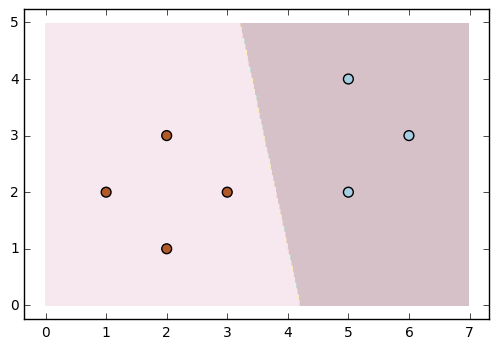

In [5]:
ridge_classify(seven_X, seven_y)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0`.

In [6]:
def linear_regression_classify(X, y):
    linear_regression = LinearRegression()
    linear_regression.fit(X, y)
    plot_2d_clf_problem(X, y, h=lambda x: linear_regression.predict(x) >= 0)

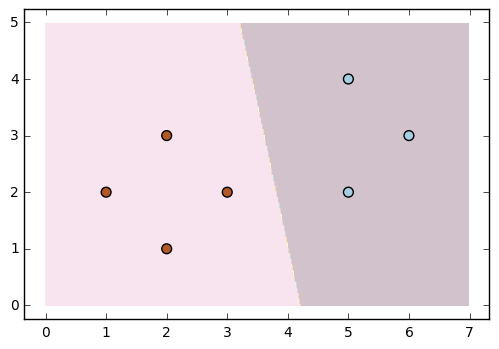

In [7]:
linear_regression_classify(seven_X, seven_y)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $0$ i $1$ umjesto $-1$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

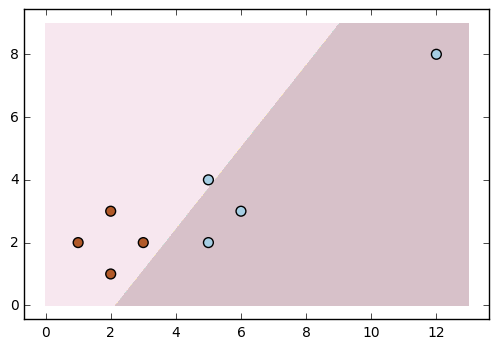

In [9]:
ridge_classify(outlier_X, outlier_y)

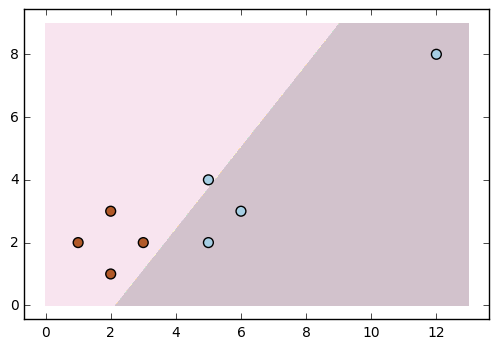

In [10]:
linear_regression_classify(outlier_X, outlier_y)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [11]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

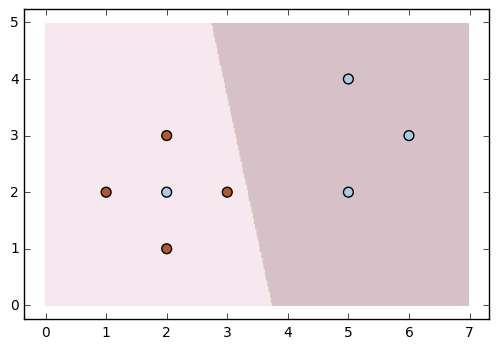

In [12]:
ridge_classify(unsep_X, unsep_y)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Zašto?

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki da je svaka od klasa "zbijena" u jednu grupu.

In [13]:
from sklearn.datasets import make_classification

In [14]:
random_X, random_y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)

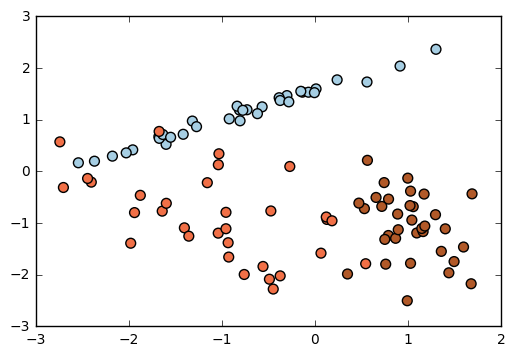

In [15]:
plot_2d_clf_problem(random_X, random_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$ i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema je one-vs-one (OVO). Koja je prednost sheme OVR nad shemom OVO?

In [16]:
def multi_classifier(X, y):
    h1 = RidgeClassifier()
    h2 = RidgeClassifier()
    h3 = RidgeClassifier()
    
    h1.fit(X, y == 0)
    h2.fit(X, y == 1)
    h3.fit(X, y == 2)
    
    return lambda x: argmax([h1.decision_function(x), h2.decision_function(x), h3.decision_function(x)], axis=0)

In [17]:
model = multi_classifier(random_X, random_y)

In [18]:
model(random_X)

array([2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0,
       1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2,
       0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1,
       1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 2])

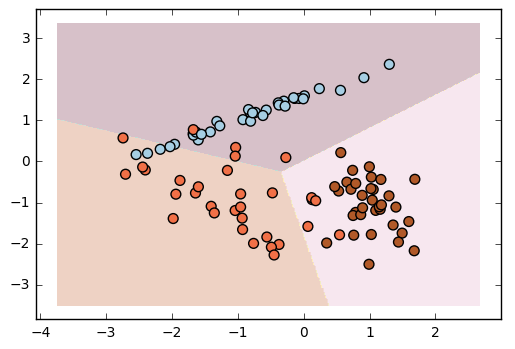

In [19]:
plot_2d_clf_problem(random_X, random_y, h=model)

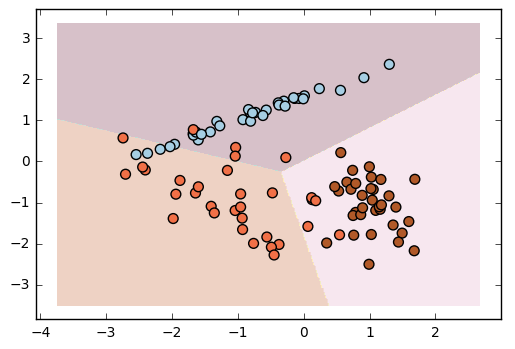

In [20]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(random_X, random_y)
plot_2d_clf_problem(random_X, random_y, h=ridge_classifier.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [21]:
def sigm(alpha):
    return lambda x: 1/(1 + exp(-alpha * x))

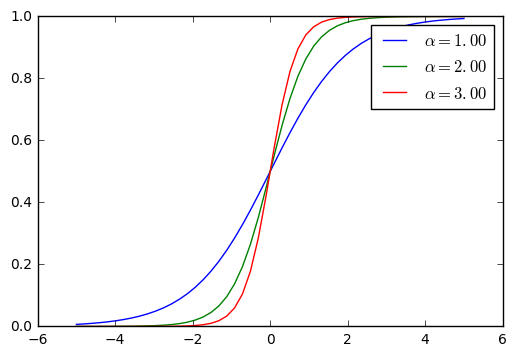

In [22]:
x_var = linspace(-5, 5)
for alpha in [1, 2, 3]:
    plot(x_var, sigm(alpha)(x_var), label=r'$\alpha=%.2f$' % alpha)
legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o magnitudi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Definirajte pomoćnu funkciju `lr_h(x,w)` koja daje predikciju (izlaz modela) za primjer `x` uz zadane težine `w`.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu. Prilagodite algoritam ili jednostavno redefinirajte oznake u skupu `seven`.

In [23]:
add_dummy_var = lambda X: sklearn.preprocessing.PolynomialFeatures(degree=1).fit_transform(X)
adjust_labels = lambda unadjusted: (unadjusted + 1)/2;

In [24]:
seven_X_dummy = add_dummy_var(seven_X)
seven_y_adjusted = adjust_labels(seven_y)

In [25]:
def lr_h(x, w):
    return 1/(1 + exp(-x.dot(w.T)))

In [26]:
def gradient_descent(w0, df, eta=0.01, max_iter=2000, epsilon=0.0001, trace=False):
    if trace:
        W = zeros([max_iter, len(w0)])
    
    w = w0
    for i in range(max_iter):
        dw = df(w)
        
        if norm(dw) < epsilon:
            break
            
        w = w - eta*dw
        
        if trace:
            W[i, :] = w
        
    print('Gradient descent finished, iter=%d, norm(dw)=%f, w=%s.' % (i + 1, norm(dw), str(w)))
    
    if trace:
        return w, W
    else:
        return w

In [57]:
def dw(w, alpha, X, y, fit_intercept):
    regularization_term = ones(len(w))*alpha*w
    if fit_intercept:
        regularization_term[0] = 0
    return (lr_h(X, w) - y).dot(X) + regularization_term

In [58]:
def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, fit_intercept=True):
    if fit_intercept:
        X = add_dummy_var(X)
    N, n = shape(X)
    w0 = ones(n)
    
    return gradient_descent(w0, lambda w: dw(w, alpha, X, y, fit_intercept), eta, max_iter, epsilon, trace)

#### (c)

Definirajte funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` koristeći dane težine `w`. Možete iskoristiti funkciju [`metrics.log_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html).

In [59]:
from sklearn.metrics import log_loss

In [60]:
def cross_entropy_error(X, y, w):
    return log_loss(y, lr_h(X, w), normalize=False)

In [61]:
def error_trace(X, y, W, error_function):
    return apply_along_axis(lambda w: error_function(X, y, w), 1, W)

#### (d)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije.

In [62]:
seven_w, seven_W = lr_train(seven_X, seven_y_adjusted, trace=True)

Gradient descent finished, iter=2000, norm(dw)=0.140936, w=[ 6.55083257 -2.13198483  0.52703336].


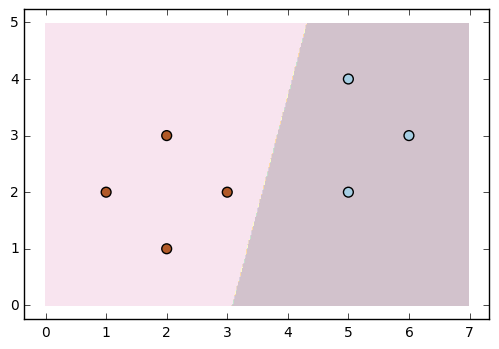

In [63]:
plot_2d_clf_problem(seven_X, seven_y_adjusted, lambda x: lr_h(add_dummy_var(x), seven_w) > 0.5)

In [64]:
cross_entropy_error(add_dummy_var(seven_X), seven_y_adjusted, seven_w)

0.52661718530020796

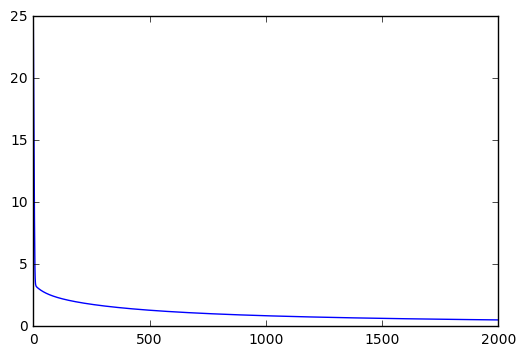

In [65]:
plot(error_trace(add_dummy_var(seven_X), seven_y_adjusted, seven_W, cross_entropy_error))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu (o kojim parametrima) to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (e)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Za izračun pogreške možete koristiti funkciju [`metrics.zero_one_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.zero_one_loss.html#sklearn.metrics.zero_one_loss). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [66]:
from sklearn.metrics import zero_one_loss

In [67]:
def zero_one_error(X, y, w):
    return zero_one_loss(y > 0.5, lr_h(X, w) > 0.5, normalize=False)

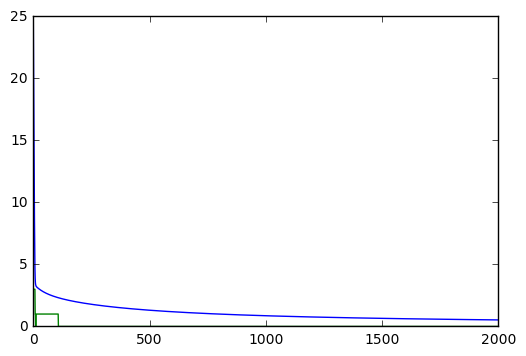

In [68]:
plot(error_trace(add_dummy_var(seven_X), seven_y_adjusted, seven_W, cross_entropy_error))
plot(error_trace(add_dummy_var(seven_X), seven_y_adjusted, seven_W, zero_one_error))

In [69]:
def plot_cross_entropy(X, y, eta_value):
    w, W = lr_train(X, y, trace=True, eta=eta_value)
    plot(error_trace(add_dummy_var(X), y, W, cross_entropy_error), label=r'$\eta=%.4f$' % eta_value)

Gradient descent finished, iter=2000, norm(dw)=0.239801, w=[ 4.77716613 -1.76905866  0.64996542].
Gradient descent finished, iter=2000, norm(dw)=0.140936, w=[ 6.55083257 -2.13198483  0.52703336].
Gradient descent finished, iter=2000, norm(dw)=0.035132, w=[ 11.56032719  -3.25250055   0.33100844].
Gradient descent finished, iter=2000, norm(dw)=0.018567, w=[ 14.00885433  -3.83586666   0.2888264 ].


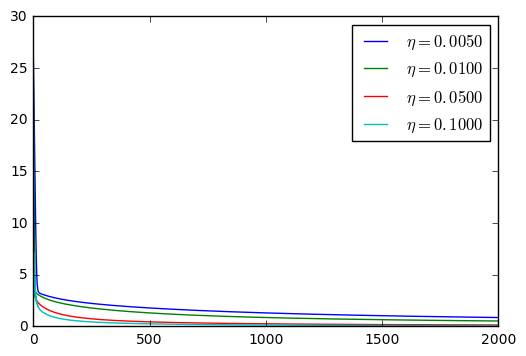

In [70]:
for eta in [0.005, 0.01, 0.05, 0.1]:
    plot_cross_entropy(seven_X, seven_y_adjusted, eta)
legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (f)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije načine optimizacije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
def lr_classify(X, y):
    logistic_regression = LogisticRegression(max_iter=2000)
    logistic_regression.fit(X, y)
    plot_2d_clf_problem(X, y, h=logistic_regression.predict)

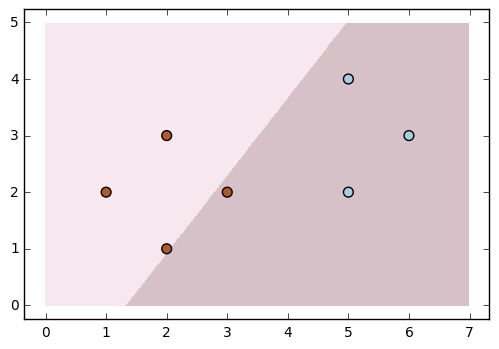

In [73]:
lr_classify(seven_X, seven_y)

Gradient descent finished, iter=2000, norm(dw)=0.112283, w=[ 6.15228235 -1.64254888 -0.01146364].


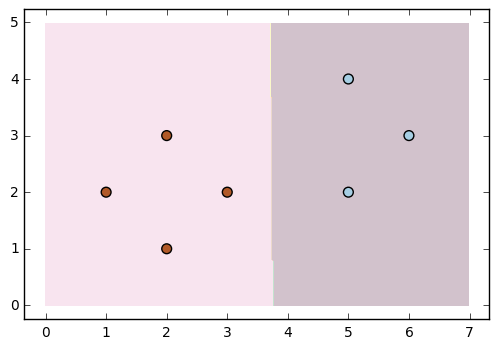

In [74]:
w=lr_train(seven_X, seven_y_adjusted, alpha=0.18)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(add_dummy_var(x), w) > 0.5)

### 4. Analiza logističke regresije

#### (a)

Provjerite kako se logistička nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

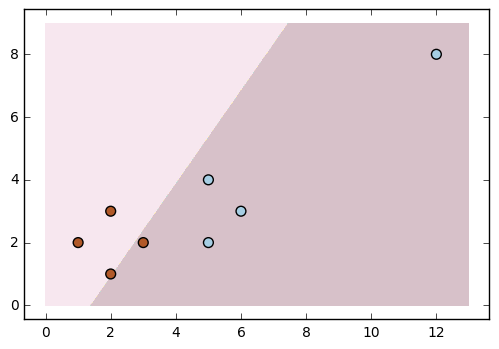

In [75]:
lr_classify(outlier_X, outlier_y)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


In [50]:
def plot_for_iterations(X, W, fun):
    plot(apply_along_axis(lambda w: fun(X, w), 1, W))

In [51]:
def plot_examples_and_weights(X, W):
    plot_for_iterations(X, seven_W, lr_h)
    figure()
    plot_for_iterations(X, seven_W, lambda X, w: w)

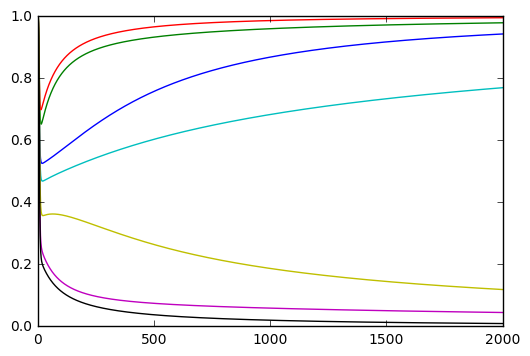

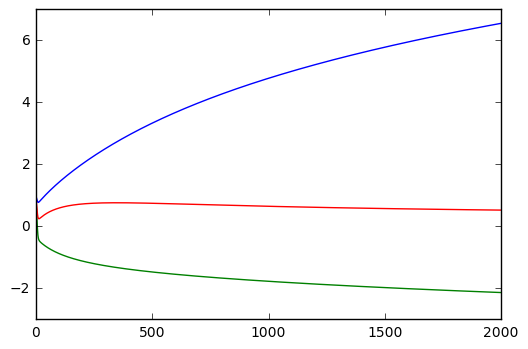

In [52]:
plot_examples_and_weights(seven_X_dummy, seven_W)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

In [53]:
unsep_X_dummy = add_dummy_var(unsep_X)
unsep_y_adjusted = adjust_labels(unsep_y)

In [54]:
unsep_w, unsep_W = lr_train(unsep_X, unsep_y_adjusted, trace=True)

Gradient descent finished, iter=2000, norm(dw)=0.048749, w=[ 4.03044388 -1.24837603 -0.12091126].


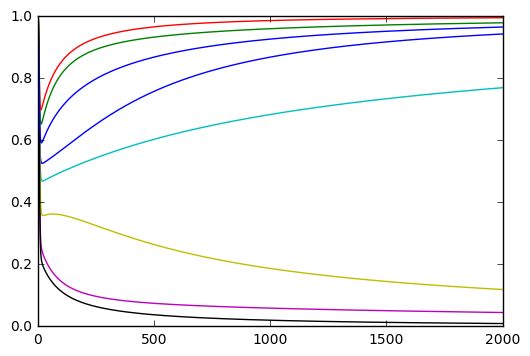

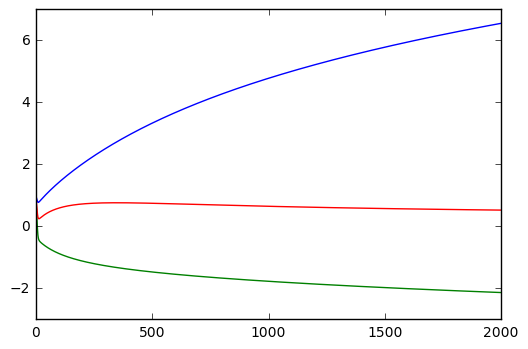

In [55]:
plot_examples_and_weights(unsep_X_dummy, unsep_W)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

Gradient descent finished, iter=2000, norm(dw)=0.123240, w=[ 6.30741728 -1.78145498  0.12402722].
Gradient descent finished, iter=2000, norm(dw)=0.042821, w=[ 4.93846251 -1.12952036 -0.24620336].
Gradient descent finished, iter=1710, norm(dw)=0.000100, w=[ 1.84999718 -0.37012467 -0.1076379 ].
Gradient descent finished, iter=660, norm(dw)=0.000099, w=[ 0.51304853 -0.05404707 -0.01616254].


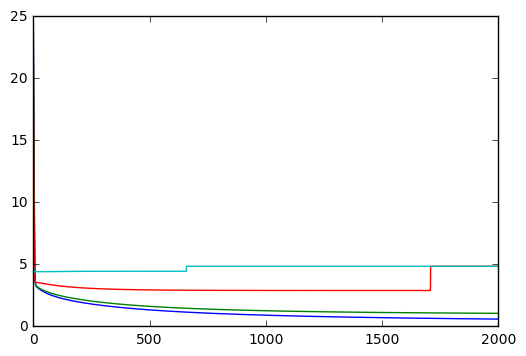

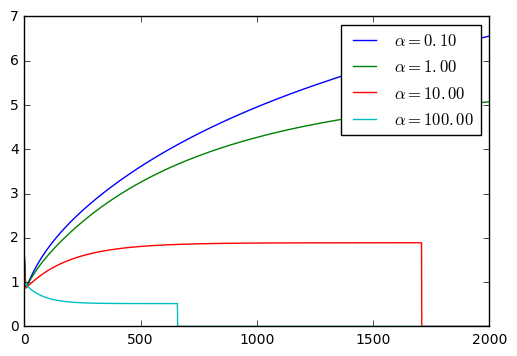

In [86]:
alpha_values = [0.1, 1, 10, 100]
for alpha_value in alpha_values:
    w_tmp, W_tmp = lr_train(seven_X, seven_y_adjusted, trace=True, alpha = alpha_value)    
    cross_entropy_errors = apply_along_axis(lambda w: cross_entropy_error(seven_X_dummy, seven_y_adjusted, w), 1, W_tmp)
    w_norms = apply_along_axis(norm, 1, W_tmp)
    
    figure(1)
    plot(cross_entropy_errors, label = r'$\alpha=%.2f$' % alpha_value)
    figure(2)
    plot(w_norms, label = r'$\alpha=%.2f$' % alpha_value)
legend()
legend()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

#### (a)

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u drugoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
random_X2, random_y2 = make_classification(n_features=2, n_clusters_per_class=2, n_redundant=0)

In [119]:
def polynomial_classify(degree, X, y):
    poly = PolynomialFeatures(degree)
    poly_X = poly.fit_transform(X)
    lr = LogisticRegression()
    lr.fit(poly_X, y)
    plot_2d_clf_problem(X, y, lambda x: lr.predict(poly.transform(x)))
    
    return lr.predict

<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

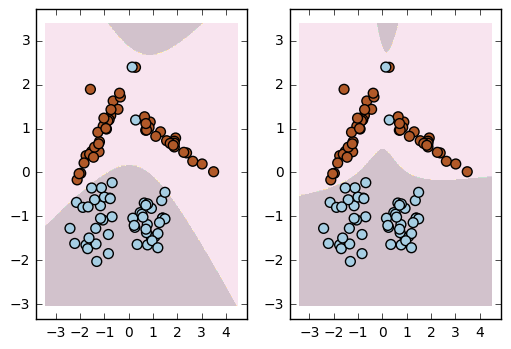

In [120]:
subplot(1, 2, 1)
polynomial_classify(2, random_X2, random_y2)
subplot(1, 2, 2)
polynomial_classify(3, random_X2, random_y2)

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

#### (b)

Podijelite skup podataka iz zadatka (a) na **skup za treniranje** i **skup za ispitivanje** u omjeru 7:3 (možete koristiti funkciju [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Na skupu za učenje trenirajte model logističke regresije s polinomom četvrtog stupnja ($d=4$) kao funkcijom preslikavanja. Prikažite empirijsku pogrešku i pogrešku generalizacije u ovisnosti o faktoru regularizacije, i to kao funkciju parametra $C$ (inverz faktora regularizacije) za $C=2^\alpha$, gdje $\alpha\in\{-8,-7,\dots,7,8\}$.

In [121]:
from sklearn.cross_validation import train_test_split

In [122]:
random_X2_train, random_X2_test, random_y2_train, random_y2_test = train_test_split(random_X2, random_y2, train_size=0.7)

In [123]:
def empirical_and_generalization_errors(X_train, y_train, X_test, Y_test, model, error_function):
    return error_function(model(X_train), y_train), error_function(model(X_test), y_test)    

In [169]:
def plot_errors_vs_regularization(X_train, y_train, X_test, y_test, alpha_range=(-8, 9), degree=4):
    alpha_min, alpha_max = alpha_range
    alphas = range(alpha_min, alpha_max)
    
    empirical_errors = []
    generalization_errors = []

    # plotting options
    cols = int(floor(sqrt(len(alphas))))
    rows = int(ceil(len(alphas)/cols))
    
    for index, alpha in enumerate(alphas):
        poly = PolynomialFeatures(degree)
        poly_X = poly.fit_transform(X_train)
        lr = LogisticRegression(C=2**alpha)
        lr.fit(poly_X, y_train)
        
        subplot(rows, cols, index + 1)
        plot_2d_clf_problem(X_train, y_train, lambda x: lr.predict(poly.transform(x)))


        empirical_errors.append(log_loss(y_train, lr.predict(poly.transform(X_train)), normalize=False))
        generalization_errors.append(log_loss(y_test, lr.predict(poly.transform(X_test)), normalize=False))
        
    figure()
    alpha_values = [alpha for alpha in alphas]
    plot(alpha_values, empirical_errors, label="empirical error")
    plot(alpha_values, generalization_errors, label="generalization error")
    legend()

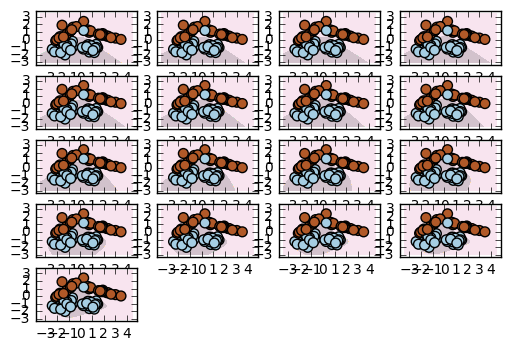

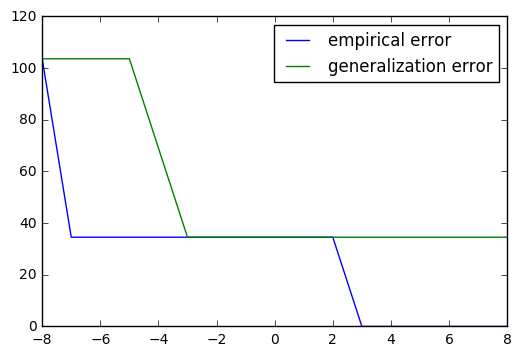

In [170]:
plot_errors_vs_regularization(random_X2_train, random_y2_train, random_X2_test, random_y2_test)

**Q:** Kojem dijelu u grafikonu odgovara prenaučenost, a kojem podnaučenost? Zašto?

**Q:** Koji biste faktor $\alpha$ odabrali i zašto?